# Trade&Ahead

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective

* To analyze data associated with stocks based upon the specific attributes and to uncover some insight about each group.


## Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?


## Data


* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock  market
* Company: Name of the company
* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that  best defines its business operations
* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* Current Price: Current stock price in dollars
* Price Change: Percentage change in the stock price in 13 weeks
* Volatility: Standard deviation of the stock price over the past 13 weeks
* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
* Net Income: Revenues minus expenses, interest, and taxes (in dollars)
* Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
* Estimated Shares Outstanding: Company's stock currently held by all its shareholders
* P/E Ratio: Ratio of the company's current stock price to the earnings per share
* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

### Importing necessary libraries

In [1]:
# installed yellowbrick
#!pip install yellowbrick

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

In [3]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [4]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

* The dataset has 340 rows and 15 columns 

In [5]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [8]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

**We won't need Ticker_Symbol because its a duplicate identifier which Security already provides the same information.**

In [9]:
df.drop("Ticker_Symbol", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# let's check for duplicate observations
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are 0 duplicate observations. There is no need to go any further 

In [11]:
# if we needed to address duplicated data
# df = df[(~df.duplicated())].copy()

<IPython.core.display.Javascript object>

In [12]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Security' are 

 ['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Apache Corporation' 'Anadarko Petroleum Corp' 'Amphenol Corp'
 'Arconic Inc' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'Broadcom' 'American Water Works Company Inc' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'Baker Hughes Inc

<IPython.core.display.Javascript object>

In [13]:
# another look at the data now that we dropped off Security and made corrections
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Security                      340 non-null    object 
 1   GICS_Sector                   340 non-null    object 
 2   GICS_Sub_Industry             340 non-null    object 
 3   Current_Price                 340 non-null    float64
 4   Price_Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash_Ratio                    340 non-null    int64  
 8   Net_Cash_Flow                 340 non-null    int64  
 9   Net_Income                    340 non-null    int64  
 10  Earnings_Per_Share            340 non-null    float64
 11  Estimated_Shares_Outstanding  340 non-null    float64
 12  P/E_Ratio                     340 non-null    float64
 13  P/B_R

<IPython.core.display.Javascript object>

* There is no need to convert objects into integers or floats so we will not need to convert at this point. 

In [14]:
# summary of the different sectors
df["GICS_Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials', 'Real Estate',
       'Materials', 'Consumer Discretionary', 'Energy',
       'Telecommunications Services'], dtype=object)

<IPython.core.display.Javascript object>

In [15]:
# summary of the different sub-industries associated within the sectors
df["GICS_Sub_Industry"].unique()


array(['Airlines', 'Pharmaceuticals', 'Health Care Equipment',
       'Application Software', 'Semiconductors', 'Agricultural Products',
       'Data Processing & Outsourced Services', 'MultiUtilities',
       'Electric Utilities', 'Life & Health Insurance',
       'Property & Casualty Insurance', 'REITs', 'Multi-line Insurance',
       'Insurance Brokers', 'Internet Software & Services',
       'Specialty Chemicals', 'Building Products', 'Biotechnology',
       'Semiconductor Equipment', 'Electrical Components & Equipment',
       'Asset Management & Custody Banks', 'Specialized REITs',
       'Internet & Direct Marketing Retail', 'Specialty Stores',
       'Managed Health Care', 'Oil & Gas Exploration & Production',
       'Electronic Components', 'Aerospace & Defense',
       'Home Entertainment Software', 'Residential REITs',
       'Water Utilities', 'Consumer Finance', 'Banks',
       'Oil & Gas Equipment & Services', 'Metal & Glass Containers',
       'Health Care Distributors',

<IPython.core.display.Javascript object>

**Let's take a look at the summary of the data**

In [16]:
df.describe()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


<IPython.core.display.Javascript object>

***Observations***

*  There are 340 observations
*  The average change in price is 4.07
*  The average stock price is 80.86.
*  The average volatility ( most likely a beta ) is 1.525
*  The average Earnings per share is 2.77

In [17]:
# checking missing values
df.isna().sum()

Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* there are no missing values to address

### Outlier detection and treatment if needed. 

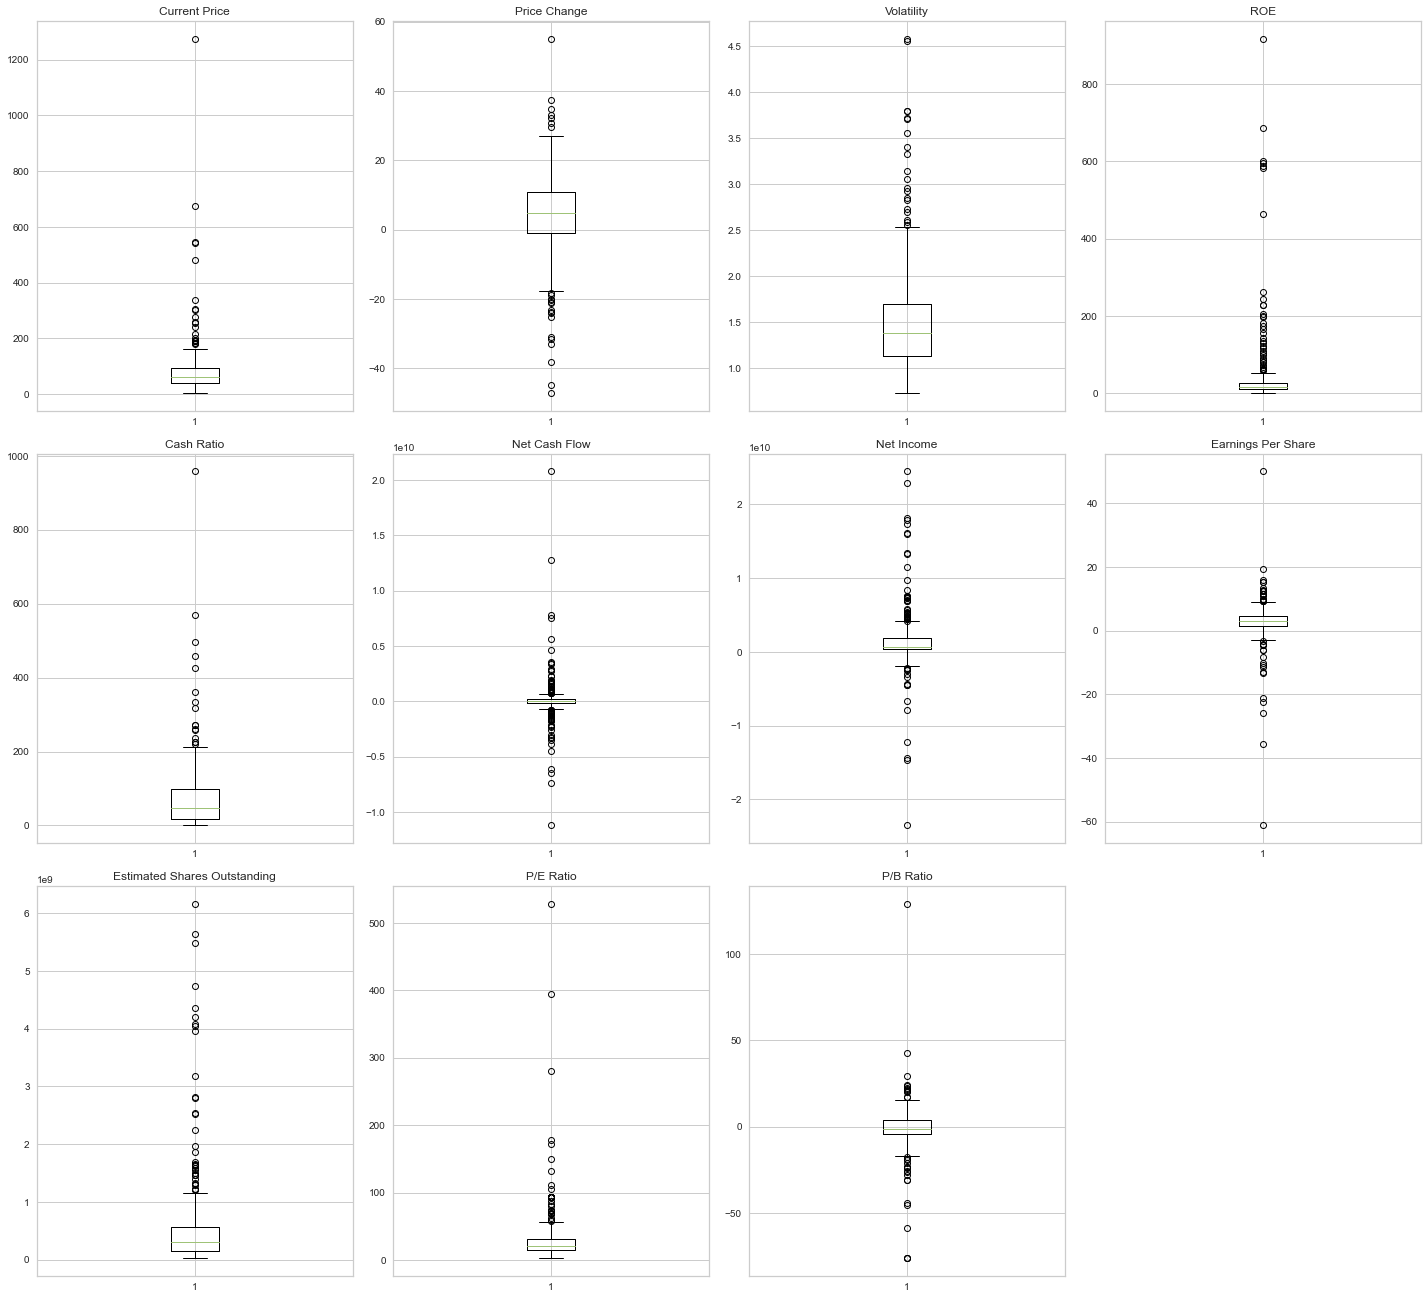

<IPython.core.display.Javascript object>

In [18]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* for this project, the outliers are important so we will not alter them as we are trying to evaluate them.
* It is noteworthy to see the large number of outliers for current price, volatility, ROE, Cash Ratio, Estimated shares outstanding and P/E ratio. It shows that there is a separation from different firms- 



## EDA

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

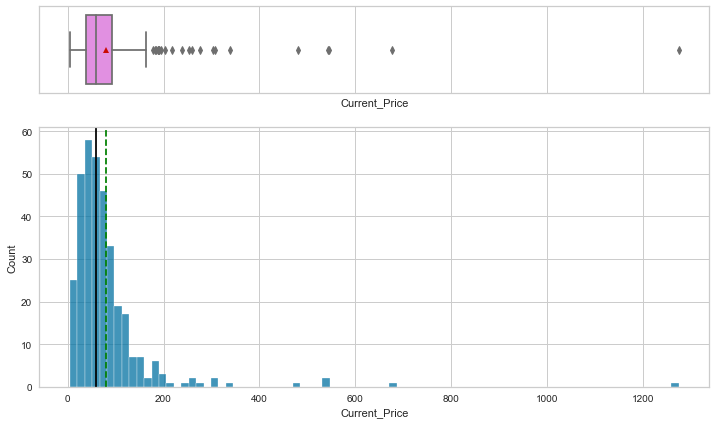

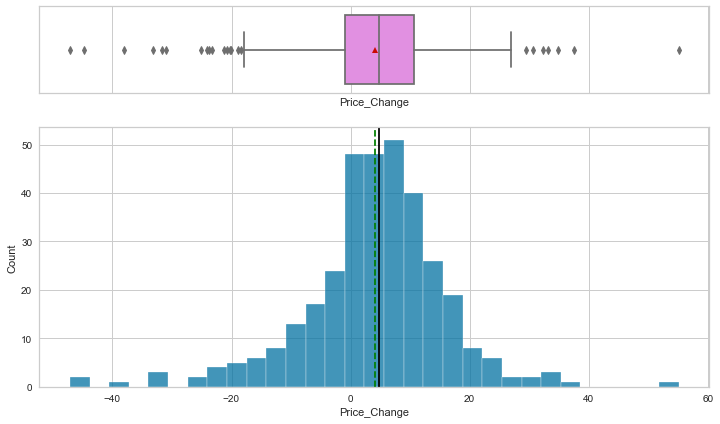

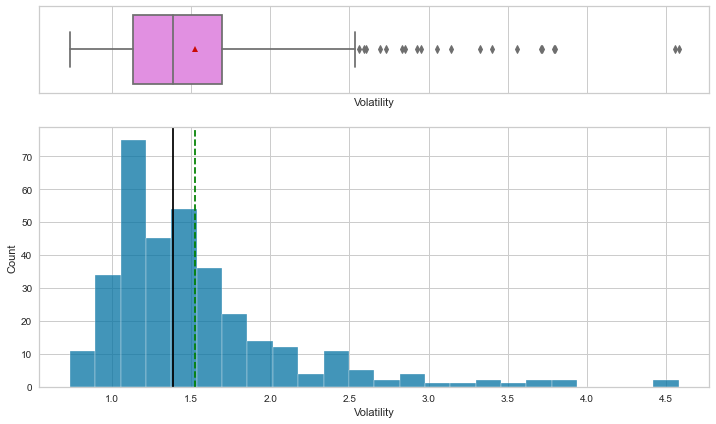

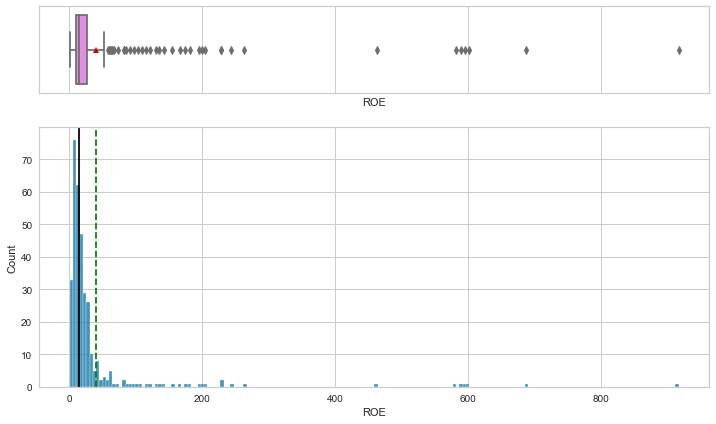

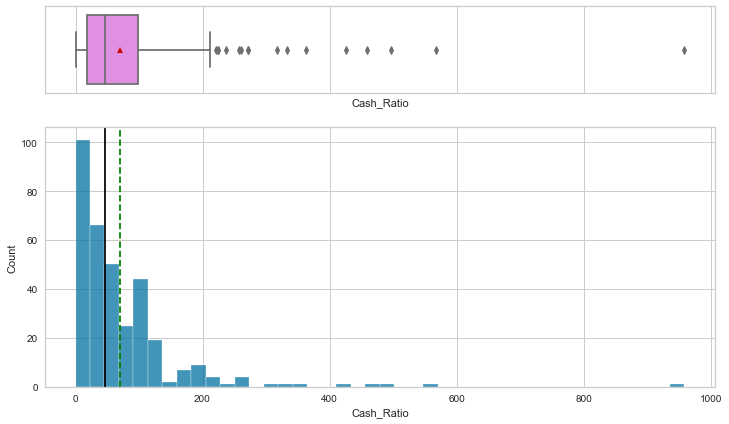

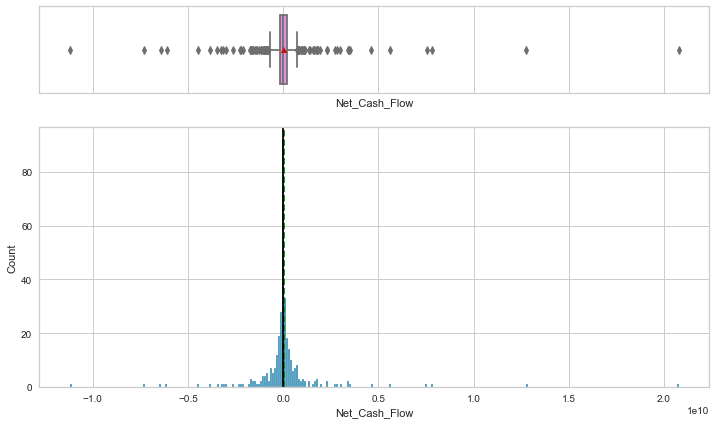

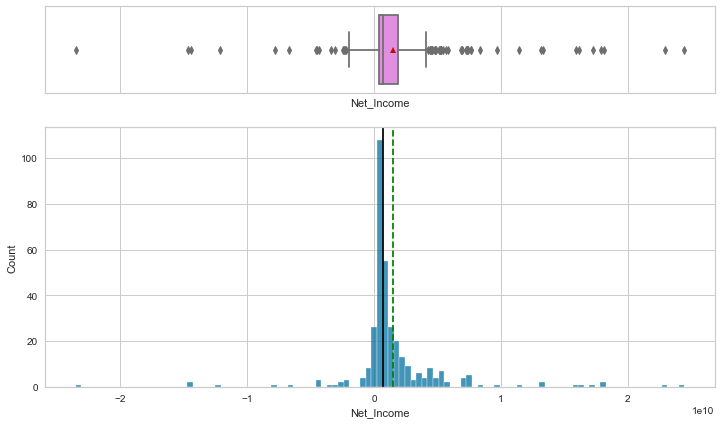

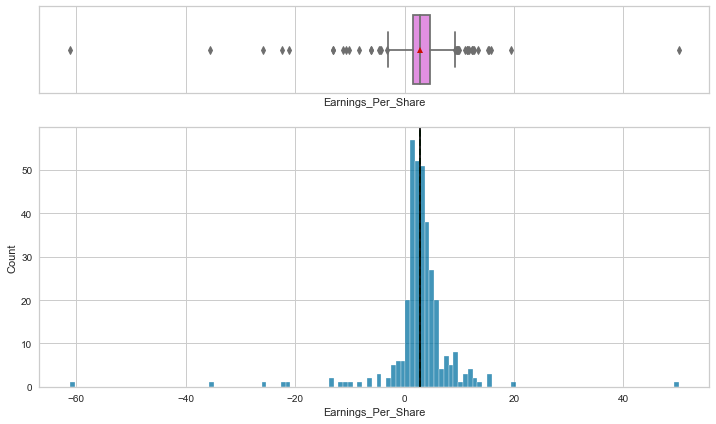

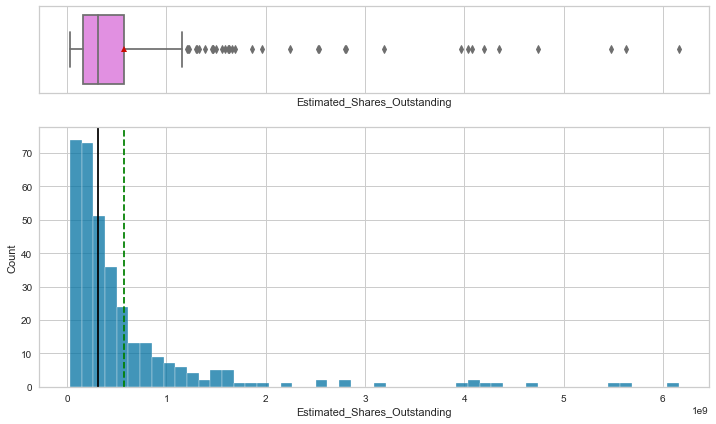

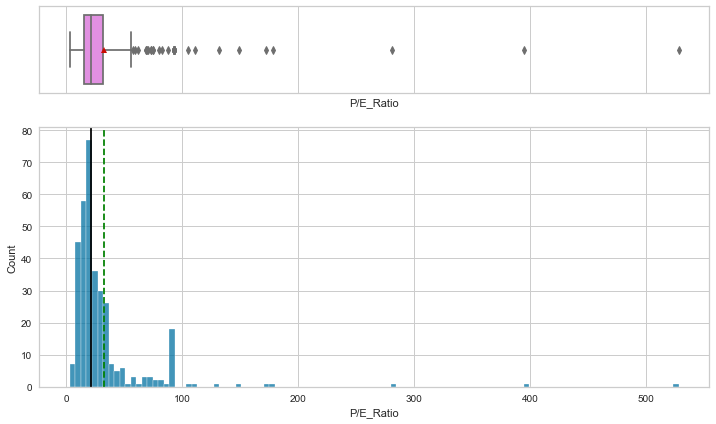

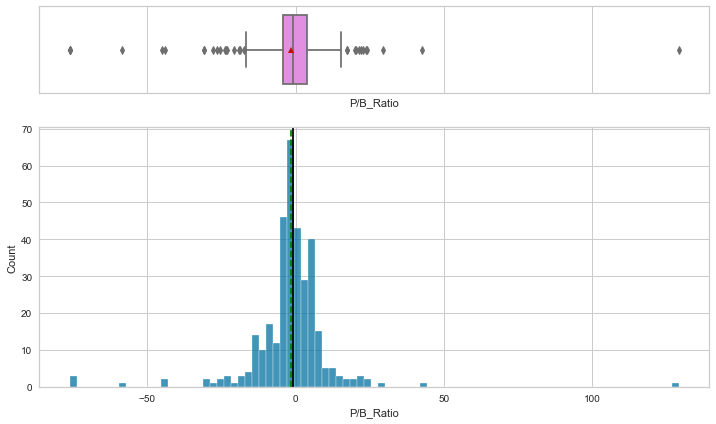

<IPython.core.display.Javascript object>

In [20]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- Current Price, Volatility, ROE, Cash Ratio, Estimated Shares Outstanding and P/E ratio have right-skewed distributions with outliers.
- Price Change, Net Cash Flow, Earnings per share, P/B ratio look to be fairly normally distributed


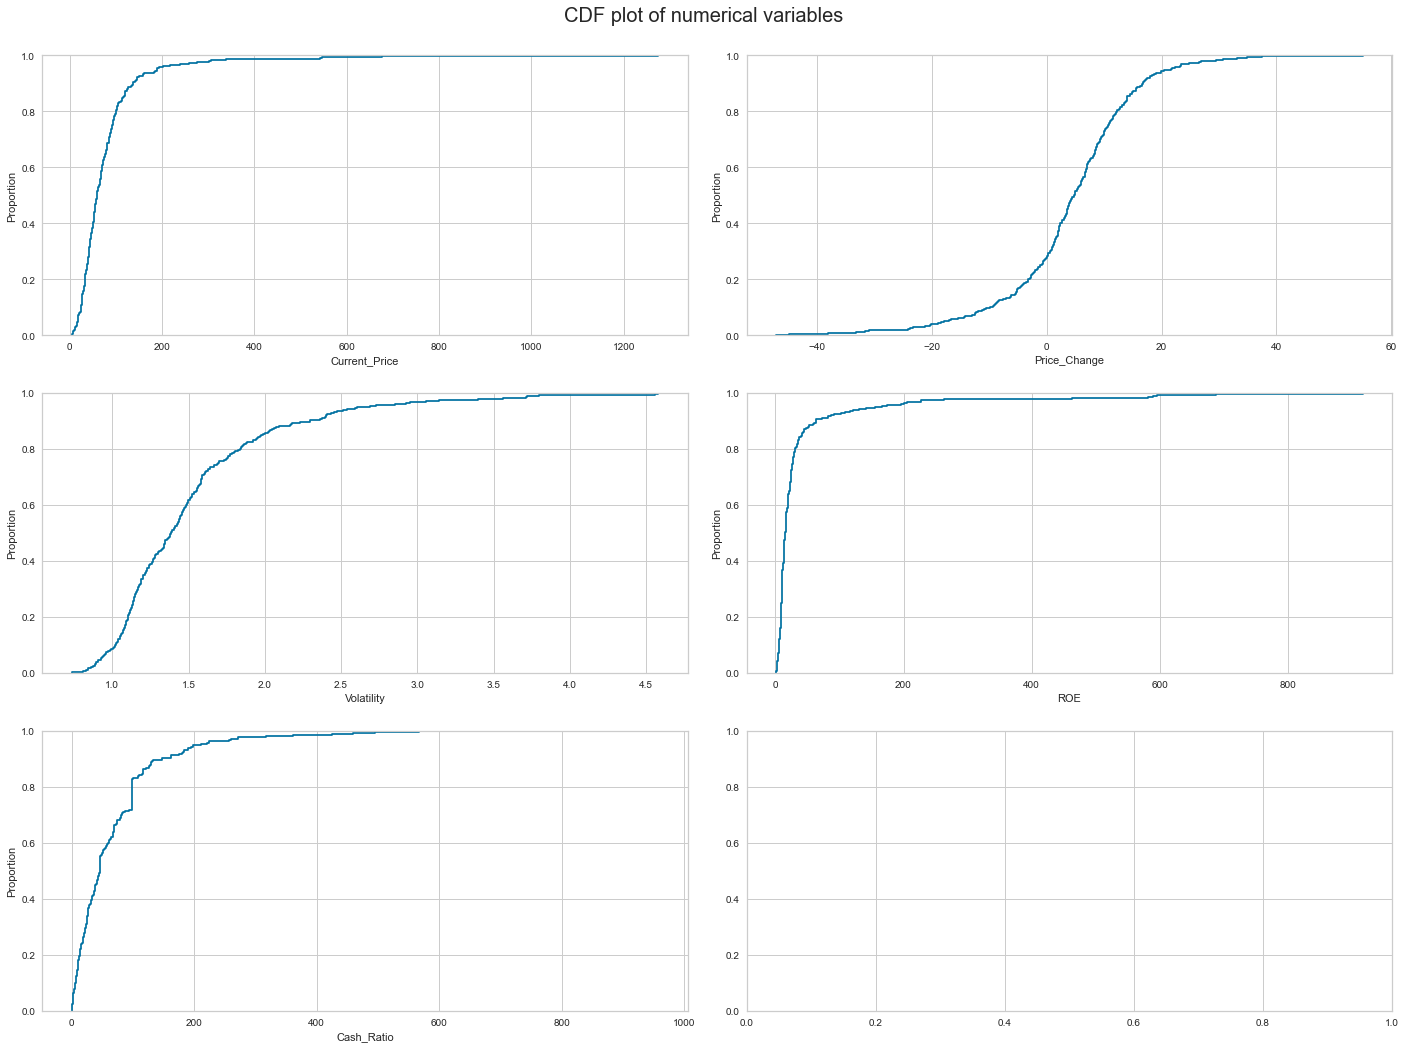

<IPython.core.display.Javascript object>

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- Current price shows that most prices are below the 92.88 per the 75% percentile.
- Price change has a interesting "s" curve IQR( -.939(25),4.8(50), 10.69(75)) 
- Volatility 25% of observations were below 1.13. 50% of observations were above 1.3) 
- ROE 50% is set at 15
- Cash Ratio- Average is 70.02

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

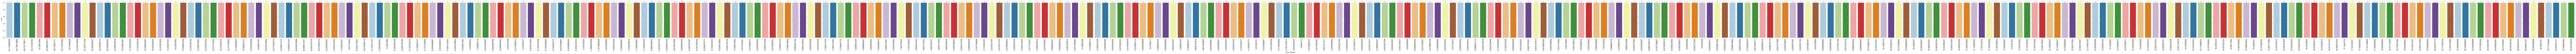

<IPython.core.display.Javascript object>

In [23]:
# let's explore Price_change further
labeled_barplot(df, "Price_Change")

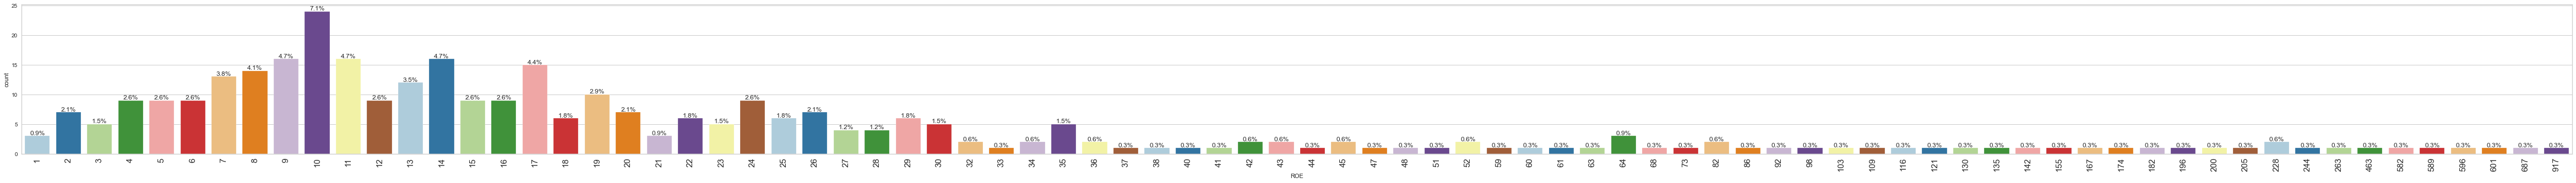

<IPython.core.display.Javascript object>

In [24]:
# let's explore ROE
labeled_barplot(df, "ROE", perc=True)

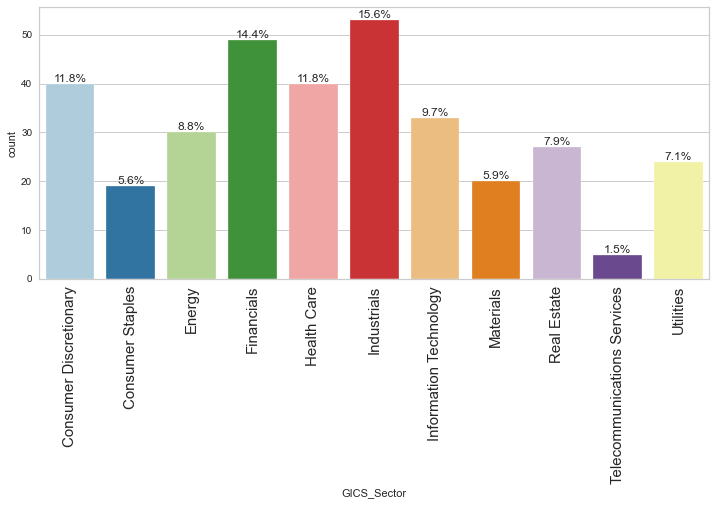

<IPython.core.display.Javascript object>

In [25]:
# let's explore GICS_SECTOR
labeled_barplot(df, "GICS_Sector", perc=True)

**Observations**



## Bivariate Analysis

**Let's check for correlations.**

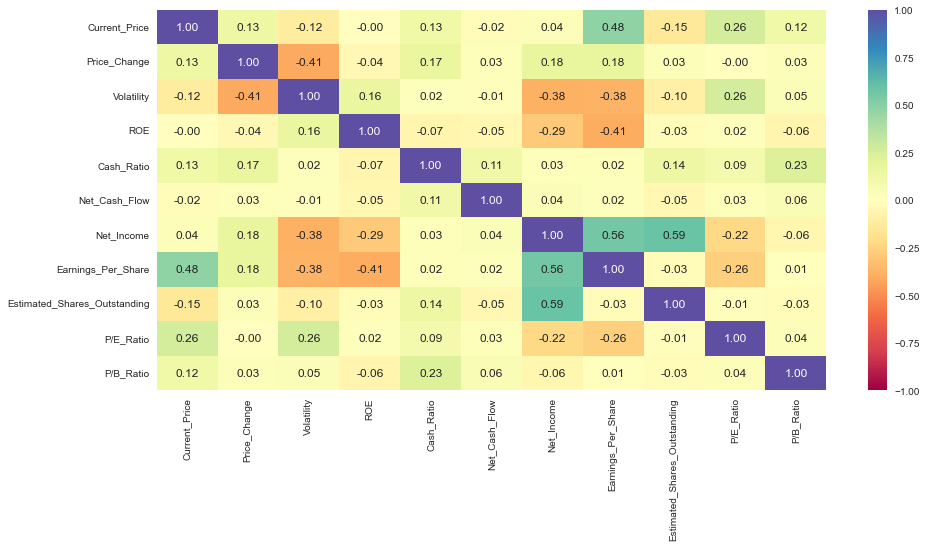

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- Net_income has a moderately positive relationship with Earnings per share and estimated shares outstanding
- have fewer discounts or no discounts at all.
- Current price and Earnings per share have a positive relationship
- Estimated shares outstanding and net income have the highest positive rate of .59 , since this is still moderate we should retain the variables as they are 

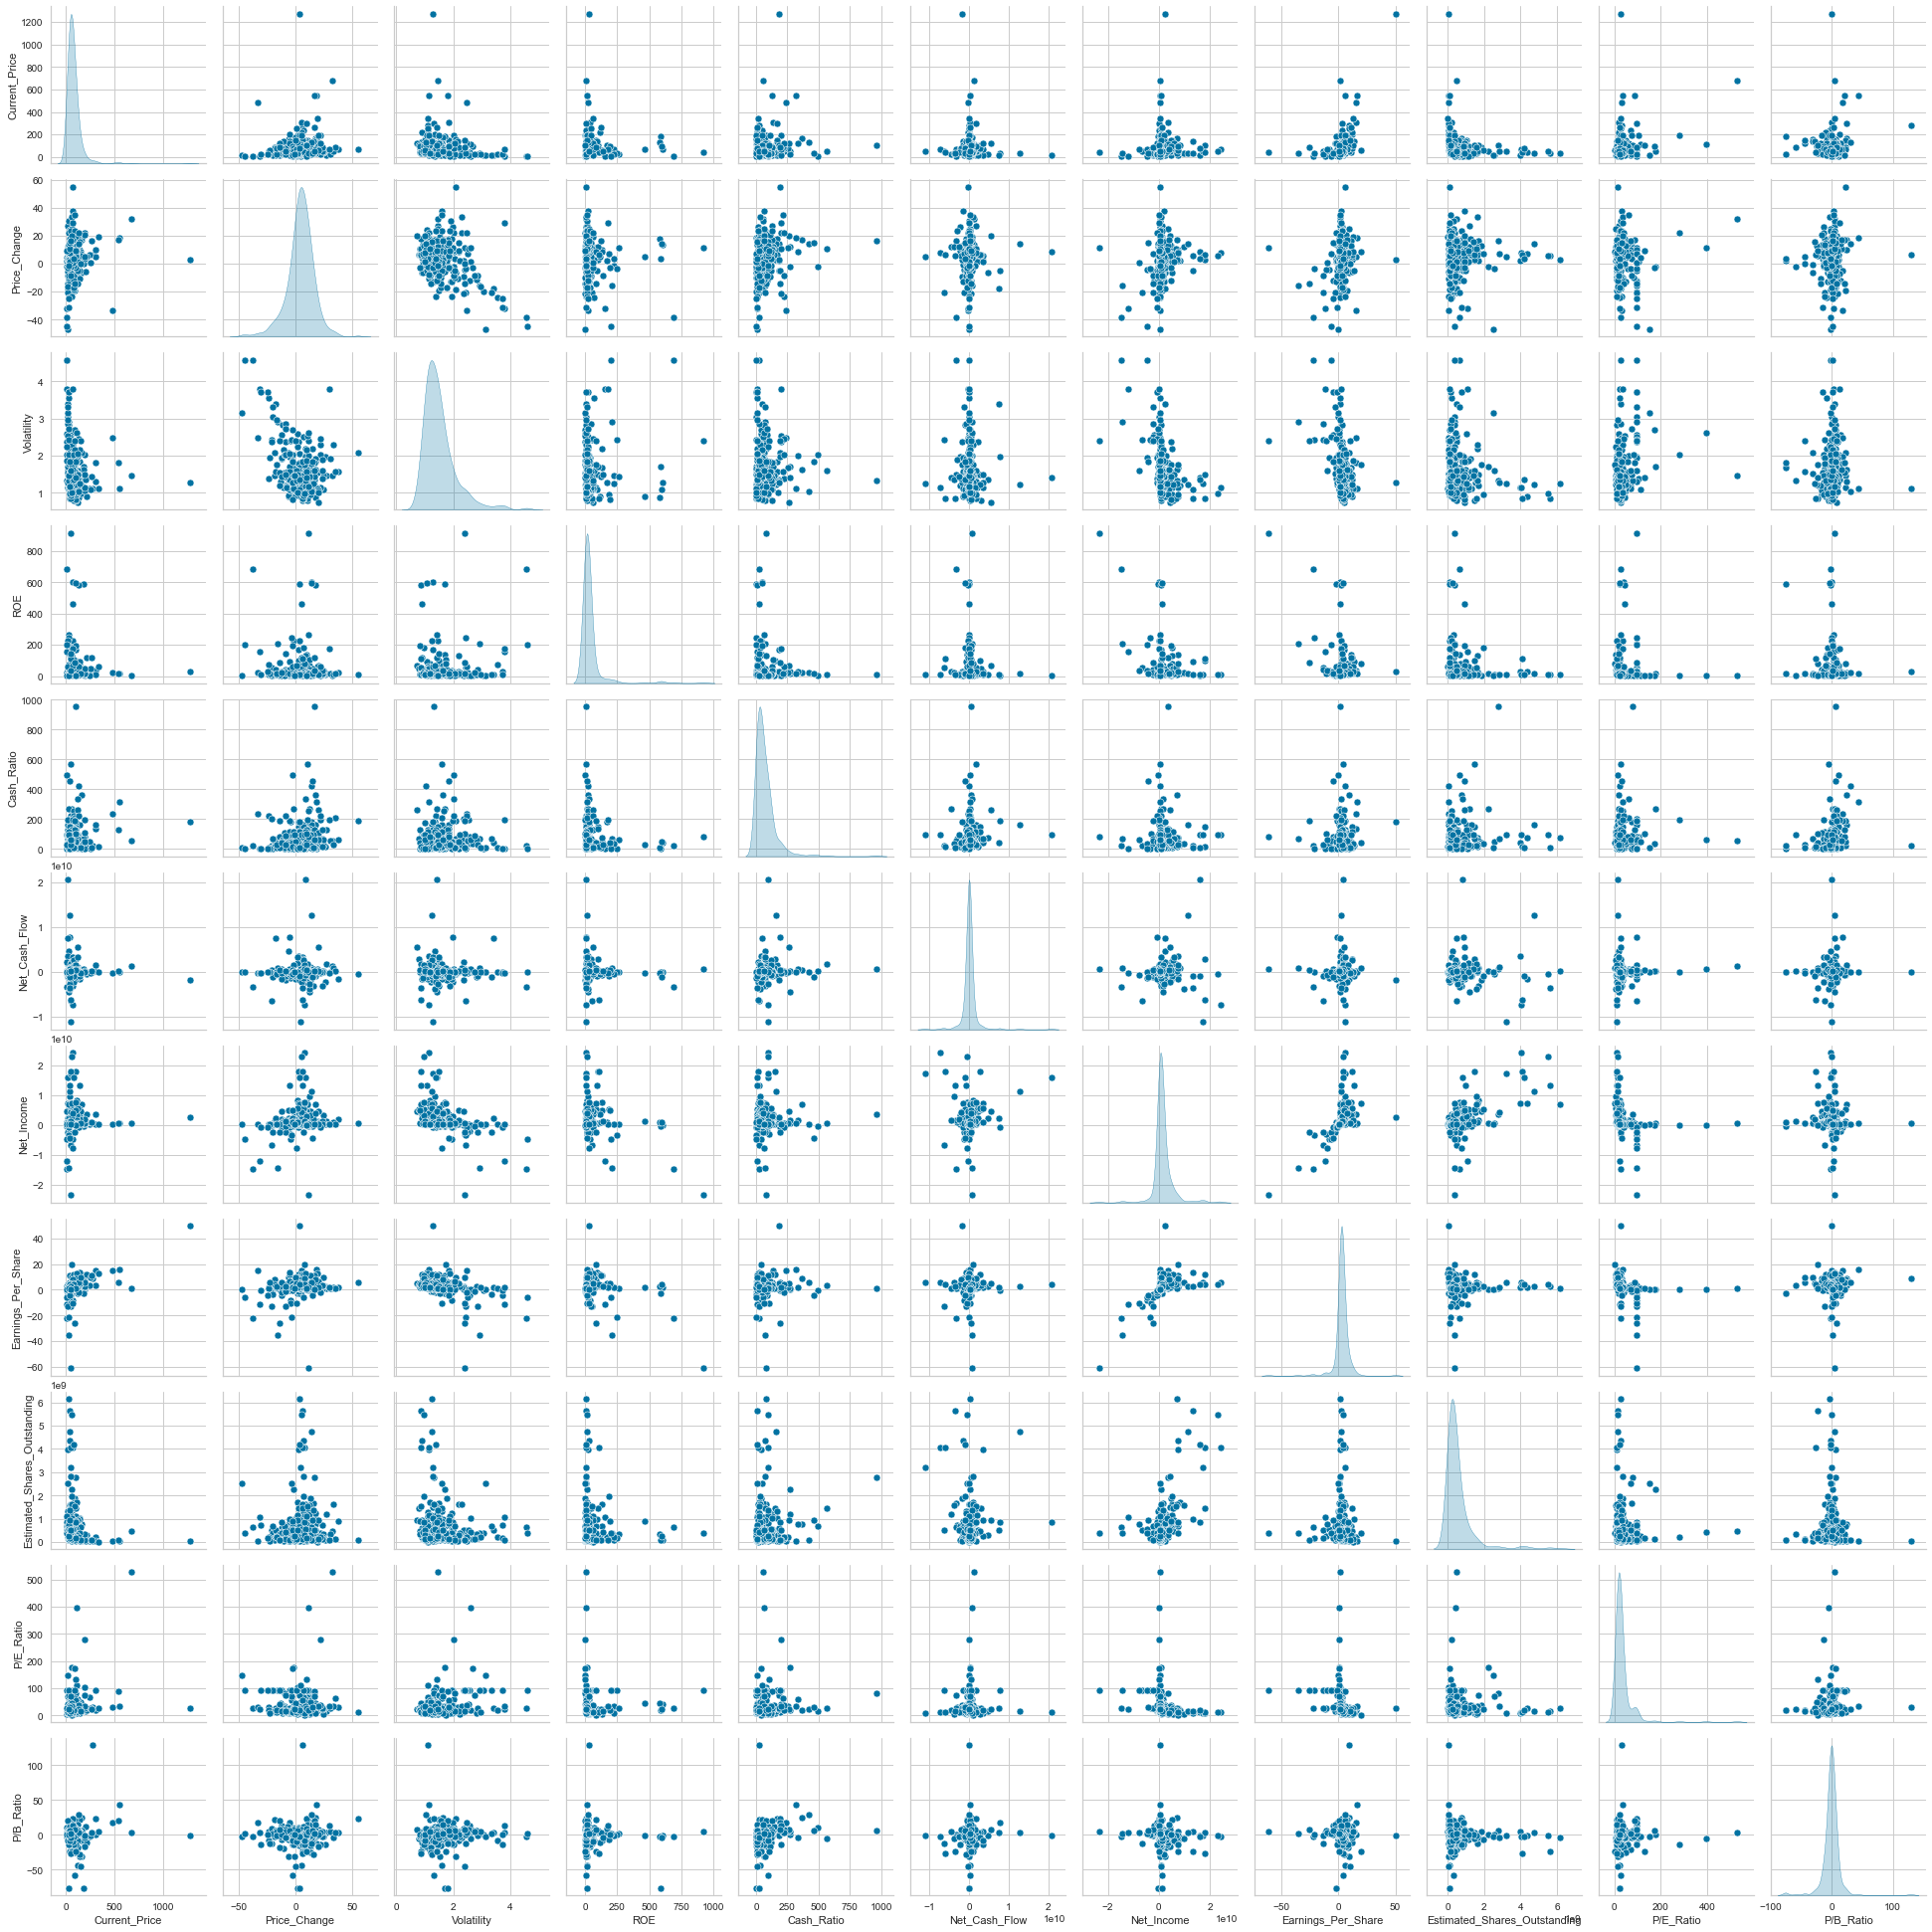

<IPython.core.display.Javascript object>

In [32]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

- as mentioned previously - price change has a normal distribution
- Net cash flow, p/e and net income seemed to have a tight but normal distribution as well. 

## Data Preprocessing

In [33]:
# variables used for clustering
num_col

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

<IPython.core.display.Javascript object>

In [34]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [35]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2659355306126447
Number of Clusters: 4 	Average Distortion: 2.207815868474751
Number of Clusters: 5 	Average Distortion: 2.1059351899972185
Number of Clusters: 6 	Average Distortion: 2.076216525792682
Number of Clusters: 7 	Average Distortion: 2.044721401261983
Number of Clusters: 8 	Average Distortion: 1.9675620188360854


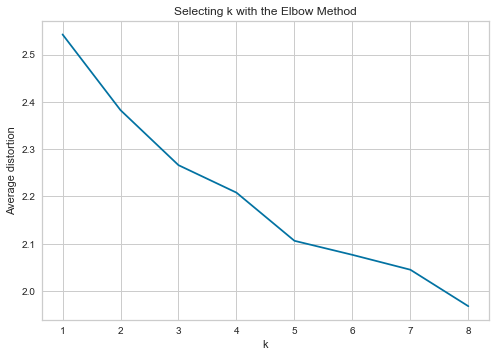

<IPython.core.display.Javascript object>

In [36]:
%%time
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Appropriate value for k seems to be 5 with a slight elbow occurring  .**

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.48998809746192357)
For n_clusters = 3, the silhouette score is 0.48811820083253776)
For n_clusters = 4, the silhouette score is 0.5130778074085875)
For n_clusters = 5, the silhouette score is 0.5033571820024209)
For n_clusters = 6, the silhouette score is 0.4999153625819912)
For n_clusters = 7, the silhouette score is 0.5110028218324034)
For n_clusters = 8, the silhouette score is 0.51558119300551)
For n_clusters = 9, the silhouette score is 0.5209348881002128)
For n_clusters = 10, the silhouette score is 0.5243978150302503)
For n_clusters = 11, the silhouette score is 0.5225168073002199)


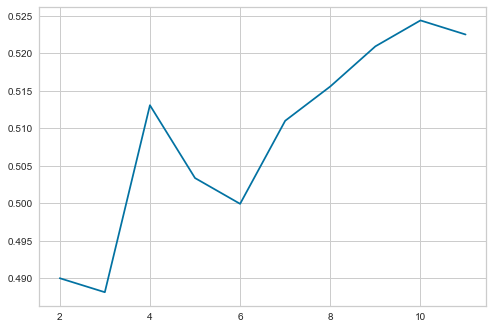

<IPython.core.display.Javascript object>

In [51]:
%%time
sil_score = []
cluster_list = list(range(2, 12))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

* Silhouette of 4 is higher than both 3 and 5
* Silhouette of 10 is higher than both 9 and 11

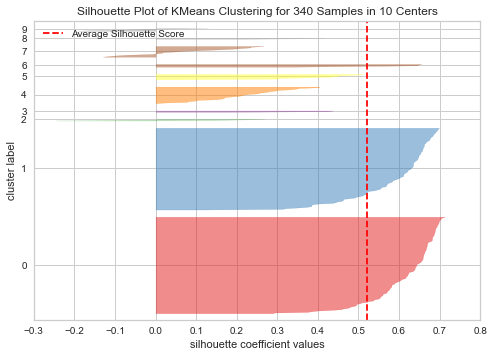

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [52]:
%%time
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

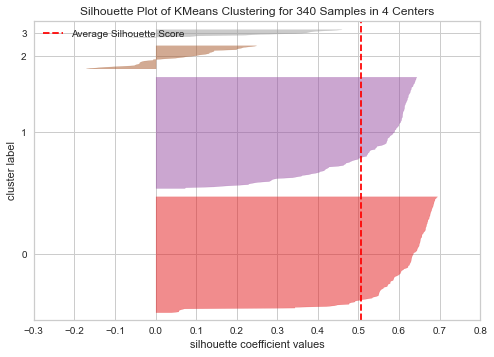

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [53]:
%%time
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

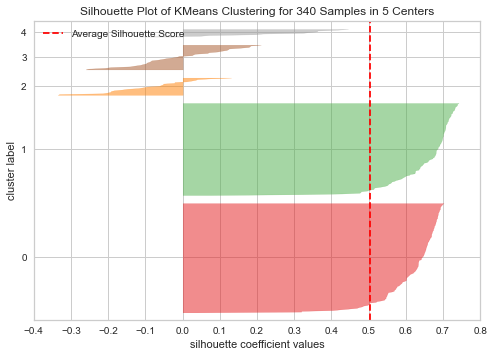

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [54]:
%%time
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.

In [56]:

# let's take 5 as number of clusters
%%time
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=1)

<IPython.core.display.Javascript object>

In [57]:
# adding kmeans cluster labels to the original and scaled dataframes
%%time
df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [58]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [59]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Earnings_Per_Share"].count().values
)

<IPython.core.display.Javascript object>

In [60]:
# let's see the names of the Securities in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["Security"].nunique(),
        "Security ",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 147 Security  0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Albemarle Corp' 'Allstate Corp'
 'Applied Materials Inc' 'American Tower Corp A' 'Anthem Inc.' 'Aon plc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'Boston Properties'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.' 'Citizens Financial Group' 'CIGNA Corp.'
 'Cincinnati Financial' 'CME Group Inc.' 'Centene Corporation'
 'Citrix Systems' 'CVS Health' 'Chevron Corp.' 'Delta Air Lines'
 'Du Pont (E.I.)' 'Quest Diagnostics' 'Danaher Corp.'
 'The Walt Disney Company' 'Discovery Communications-A'
 'Discovery Communications-C' 'Delphi Automo

<IPython.core.display.Javascript object>

In [61]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,90.602020,11.055918,1.362514,25.136054,55.993197,-65816741.496599,1804679598.639456,4.262789,512174353.489184,26.432393,-5.181481,147
1,62.223775,-2.019192,1.394918,25.153226,51.854839,218539282.258065,1312427346.774194,3.508911,346597342.602177,19.758448,-0.799999,124
2,182.854722,14.185736,1.828279,23.958333,282.833333,862765500.000000,736315541.666667,3.425000,594408611.047917,93.828954,15.131701,24
3,44.551436,-11.527511,2.625281,168.588235,44.823529,-219187970.588235,-2963932352.941176,-7.222647,481442200.283529,68.762587,-1.071023,34
4,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11


<IPython.core.display.Javascript object>

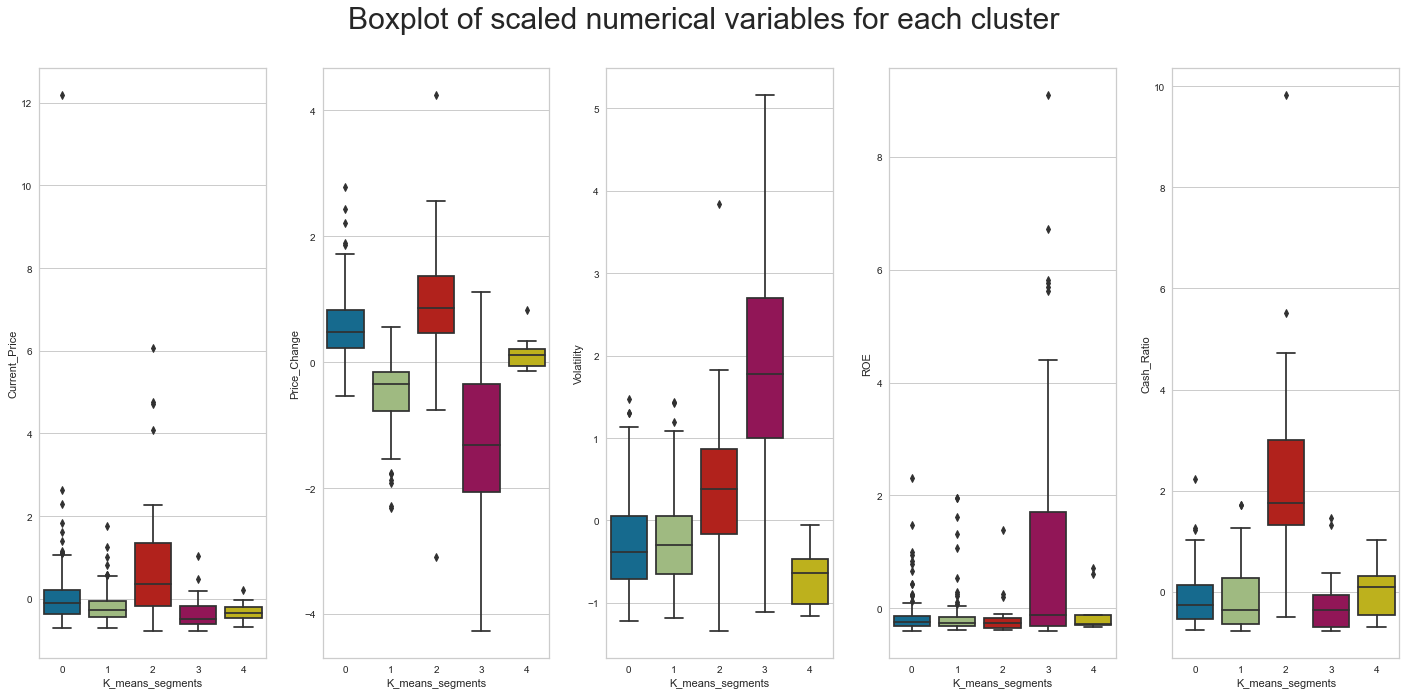

<IPython.core.display.Javascript object>

In [62]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=30)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

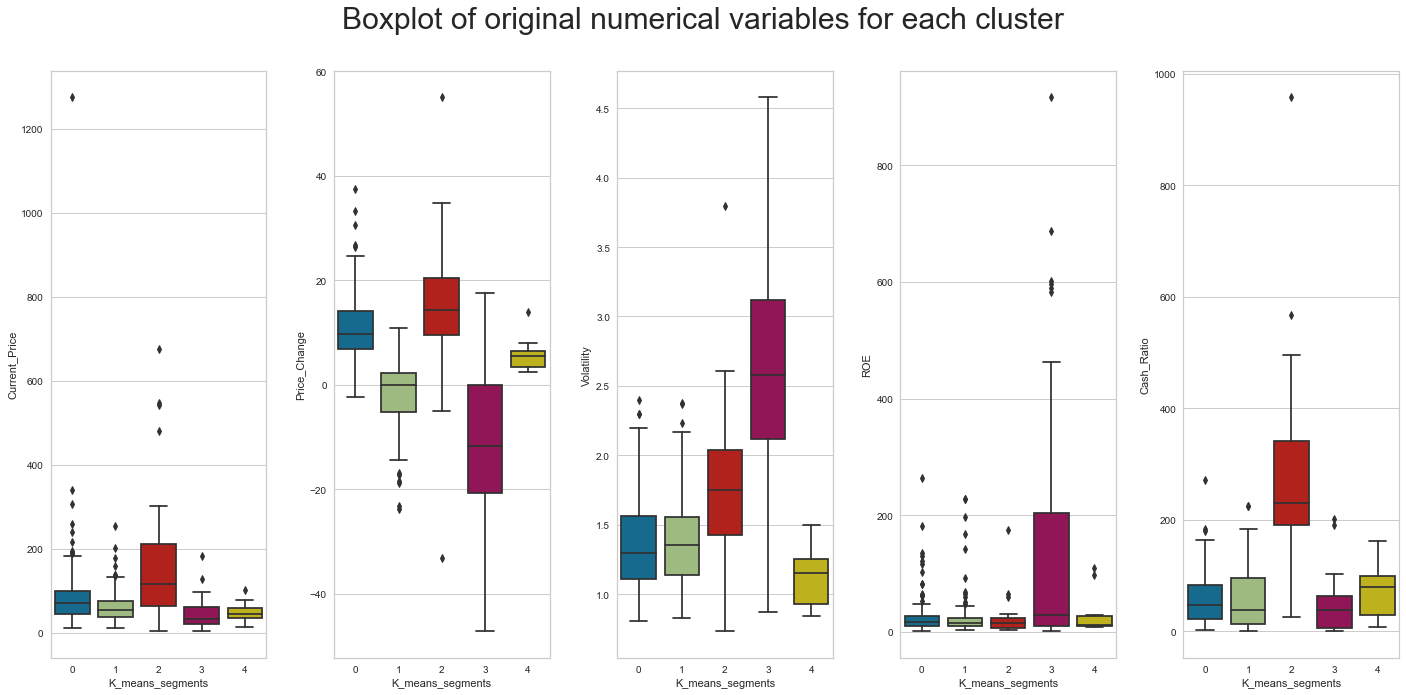

<IPython.core.display.Javascript object>

In [63]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=30)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [64]:
pd.crosstab(df.K_means_segments, df.ROE).style.highlight_max(color="lightgreen", axis=0)

ROE,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,43,44,45,47,48,51,52,59,60,61,63,64,68,73,82,86,92,98,103,109,116,121,130,135,142,155,167,174,182,196,200,205,228,244,263,463,582,589,596,601,687,917
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,5,4,2,4,8,8,9,10,3,8,5,4,4,6,3,7,3,3,2,2,4,1,5,1,2,3,3,1,0,1,2,1,0,1,1,0,2,0,0,2,0,1,0,1,0,0,1,1,1,0,0,2,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,3,1,2,4,5,7,4,6,11,3,3,4,8,4,4,8,3,2,3,0,3,2,4,3,0,2,2,2,1,0,1,1,2,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0
2,0,2,1,2,0,1,1,1,0,1,1,0,0,3,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,2,0,1,1,1,0,1,2,0,2,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,1,1,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

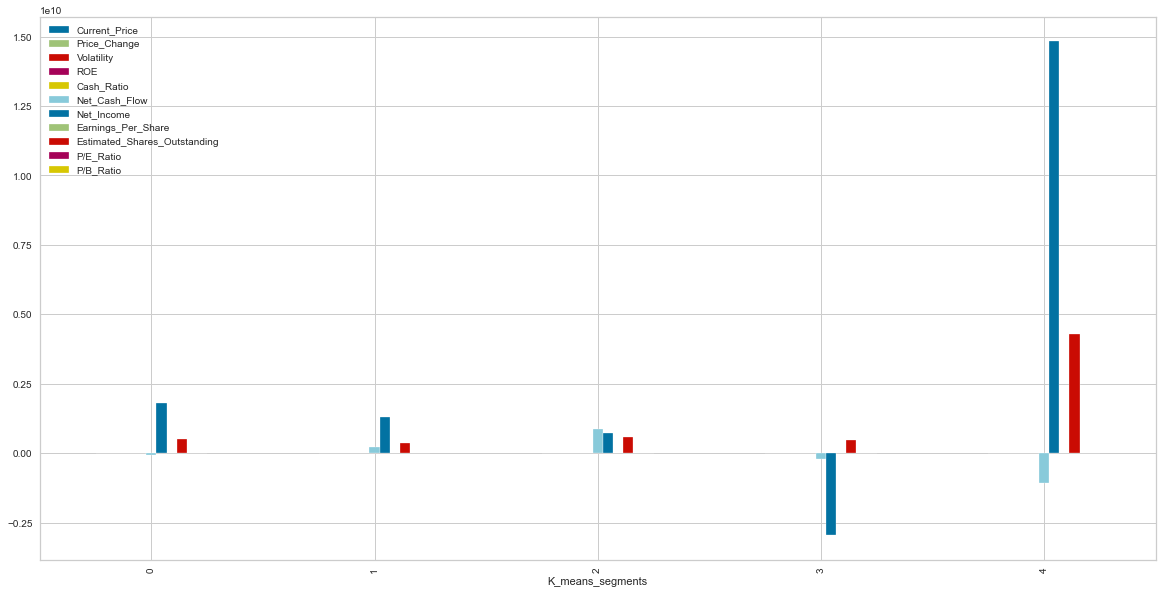

<IPython.core.display.Javascript object>

In [67]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(20, 10))

#### Insights

- **Cluster 0**:
    - This cluster has 147 Securities.
    - This cluster's current price has the second highest IQR
    - Ranks 2nd for positive associated price change
    - Ranks 4th for volatility
    - Ranking is 2nd for ROE per IQR, however it should be noted that with the exception of cluster 3, these all tend to be very closely aligned.
    - Ranks 3rd for cash ratio
    
    
- **Cluster 1**:
    - Cluster has 124 Securities
    - Ranks 3rd for current price
    - Ranks 4th for price change
    - Ranks 3rd for volatility
    - Ranks along with cluster 0 and others , but has several outliers on the top end that should be investigated
    - Ranks number 2 for cash ratio
    
- **Cluster 2**:
    - Cluster has 24 Securities
    - 1st in current price
    - 1st in positive price change
    - 2nd in volatility
    - Ranks along with the others in ROE with no real separation
    - Ranks number 2 by IQR for Cash ratio, however ranks 4th for 50% - mixed results 

- **Cluster 3**:
    - Cluster has 34 Securities
    - 4th in current price
    - Last in change in current price- with large range
    - 1st in volatility - large range 
    - 1st in ROE- large range of IQR
    - Last in cash ratio
    
- **Cluster 4**:
    - Cluster has 11 Securities
    - Last in current price
    - 3rd in positive price change with a tight range
    - Least volatile of the group
    - In the general group with the others for ROE
    - 2nd in cash ratio by median 

## Hierarchical Clustering

In [68]:
%%time
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9425734082973126.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8804851687570486.
Cophenetic correlation for Euclidean distance and average linkage is 0.941670092680735.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8583524007713139.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9190011774958905.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8033824975263462.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9334725962056853.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8777652829649023.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9371928519531106.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8653877799325563.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.936219550155365.
Cophenetic corr

<IPython.core.display.Javascript object>

In [69]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9442981785905182, which is obtained with Cityblock distance and single linkage.


<IPython.core.display.Javascript object>

In [70]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9425734082973126.
Cophenetic correlation for complete linkage is 0.8804851687570486.
Cophenetic correlation for average linkage is 0.941670092680735.
Cophenetic correlation for centroid linkage is 0.943486514517911.
Cophenetic correlation for ward linkage is 0.6995166782050831.
Cophenetic correlation for weighted linkage is 0.8583524007713139.


<IPython.core.display.Javascript object>

In [71]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.943486514517911, which is obtained with centroid linkage.


<IPython.core.display.Javascript object>

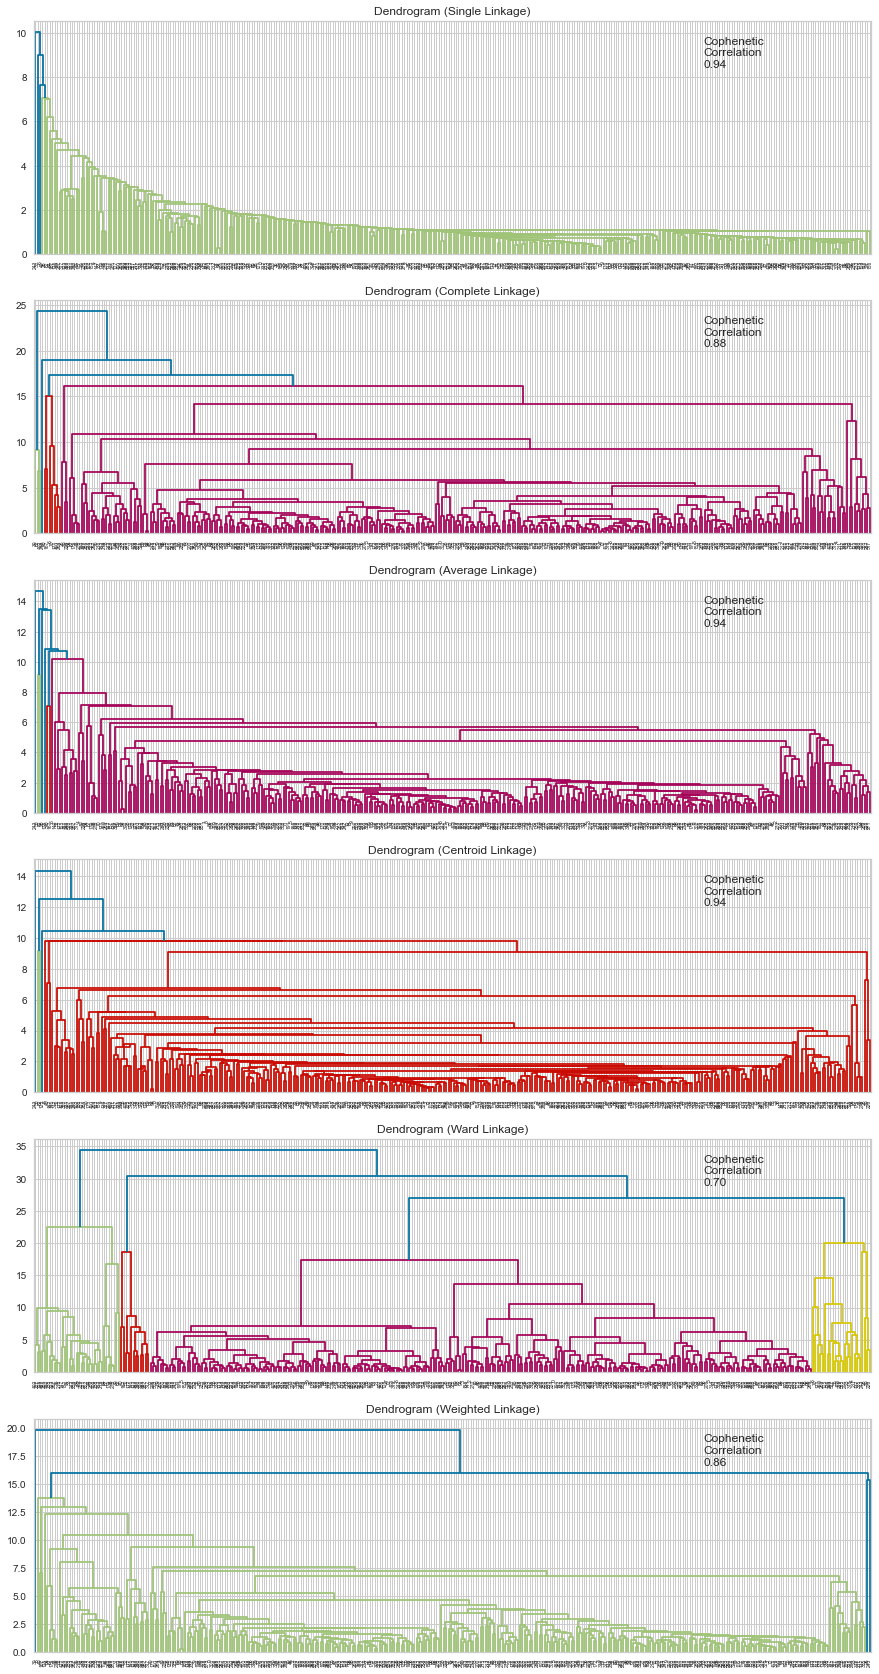

<IPython.core.display.Javascript object>

In [72]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* Ward appears to have defined clusters and separation but only has a .70 cophenetic correlation
* Average linkage, single linkage and centroid have .94 cophenetic correlation, meaning they are pretty faithful to the distances between the data points.

In [74]:
%%time
print(compare_cols)

['Linkage', 'Cophenetic Coefficient']


<IPython.core.display.Javascript object>

In [75]:
%%time
# variables used for clustering
num_col

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

<IPython.core.display.Javascript object>

In [76]:
%%time
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [77]:
%%time
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [78]:
%%time
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524589.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [79]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

In [80]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [81]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

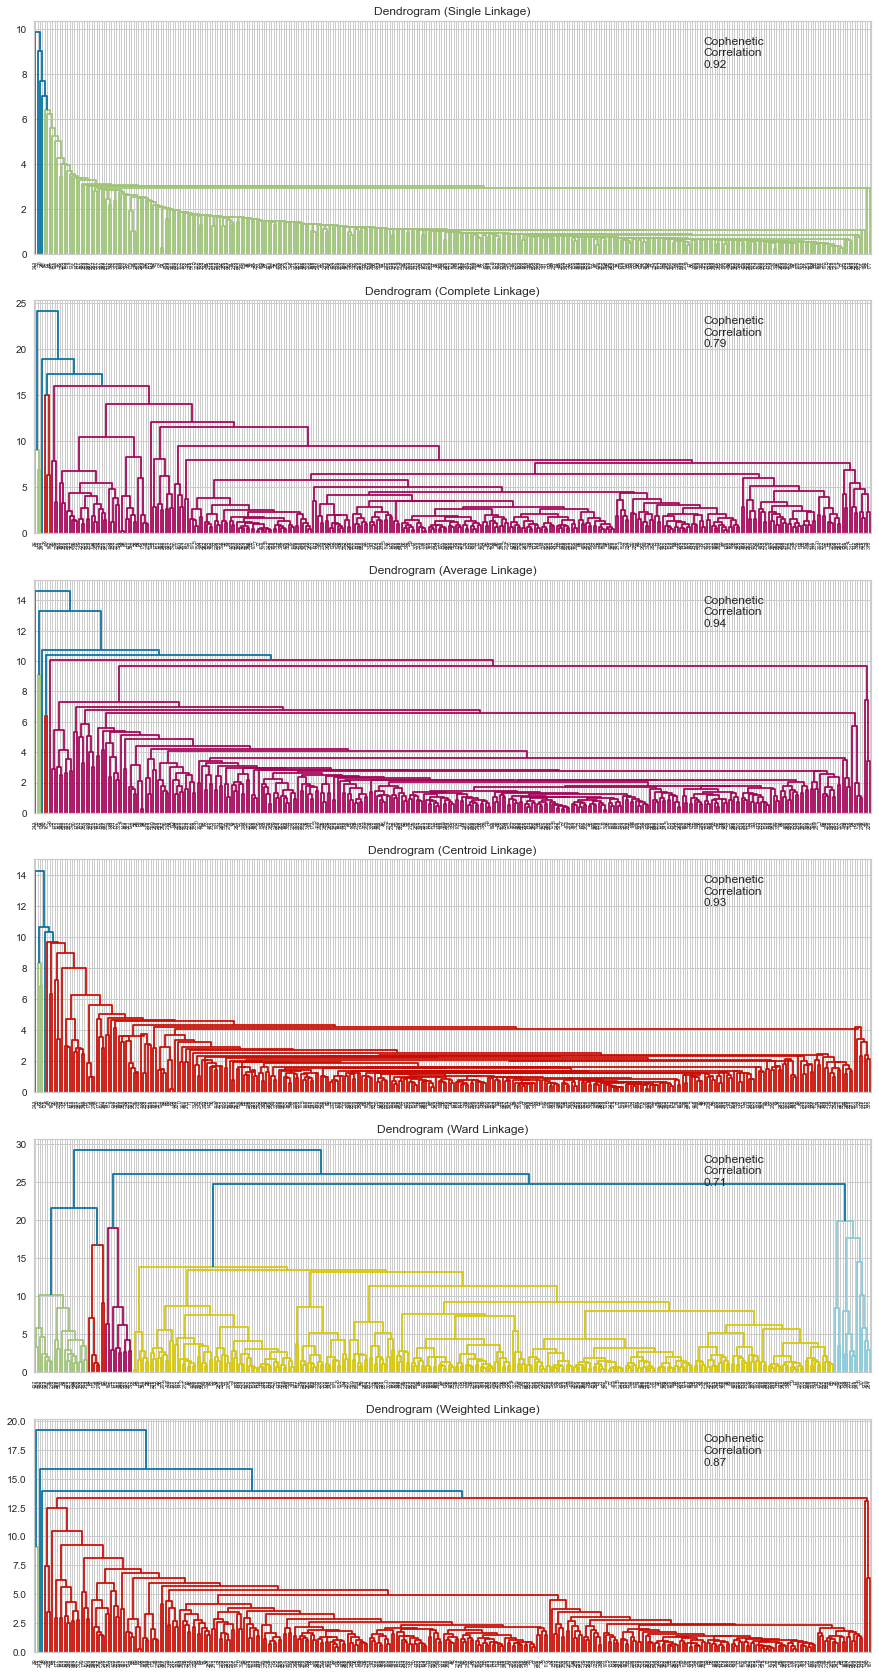

<IPython.core.display.Javascript object>

In [82]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [83]:
%%time
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923227
1,complete,0.787328
2,average,0.942254
3,centroid,0.931401
4,ward,0.710118
5,weighted,0.869378


<IPython.core.display.Javascript object>

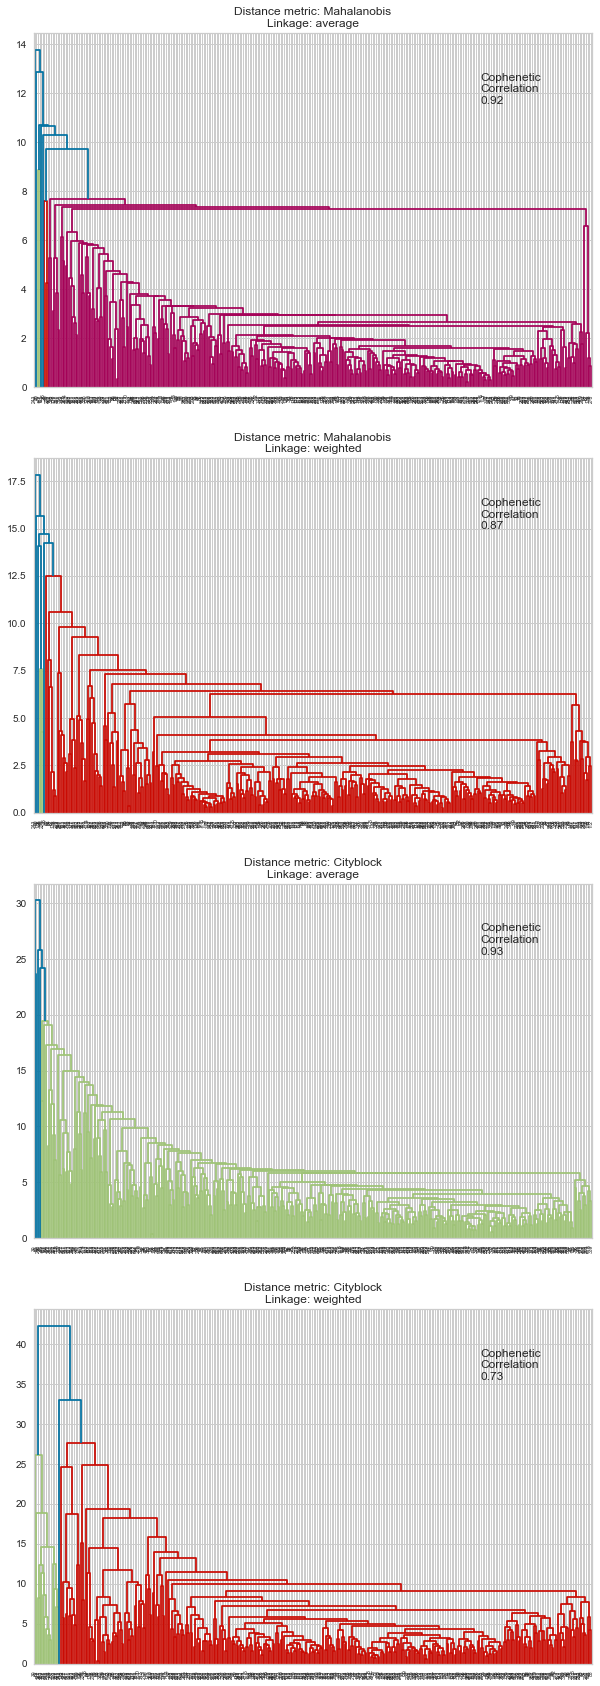

<IPython.core.display.Javascript object>

In [84]:
%%time
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

AgglomerativeClustering(n_clusters=8)

<IPython.core.display.Javascript object>

In [86]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [87]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [88]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Earnings_Per_Share"].count().values
)

<IPython.core.display.Javascript object>

In [89]:
# let's see the names of the Securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Security ",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 285 Security  3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown

<IPython.core.display.Javascript object>

In [90]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,3.000000,7
1,570.466654,3.666088,1.515959,19.833333,176.000000,23440500.000000,839355500.000000,16.598333,57823170.553333,50.550419,38.681119,1.666667,6
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,4.000000,9
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.568421,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,3.000000,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,2.000000,3
6,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2.500000,2
7,81.525556,11.783328,1.575565,14.166667,544.666667,349565833.333333,1178117333.333333,2.490000,1121045865.050000,31.693323,11.835447,2.000000,6


<IPython.core.display.Javascript object>

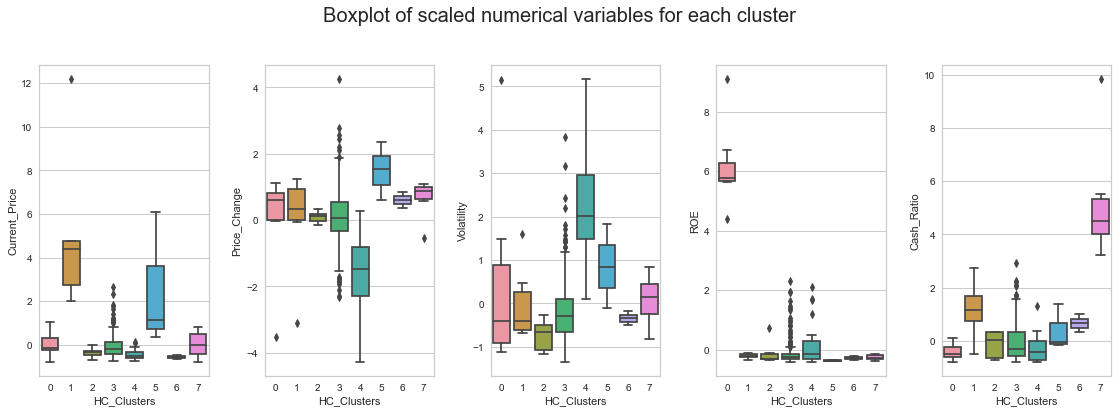

<IPython.core.display.Javascript object>

In [91]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

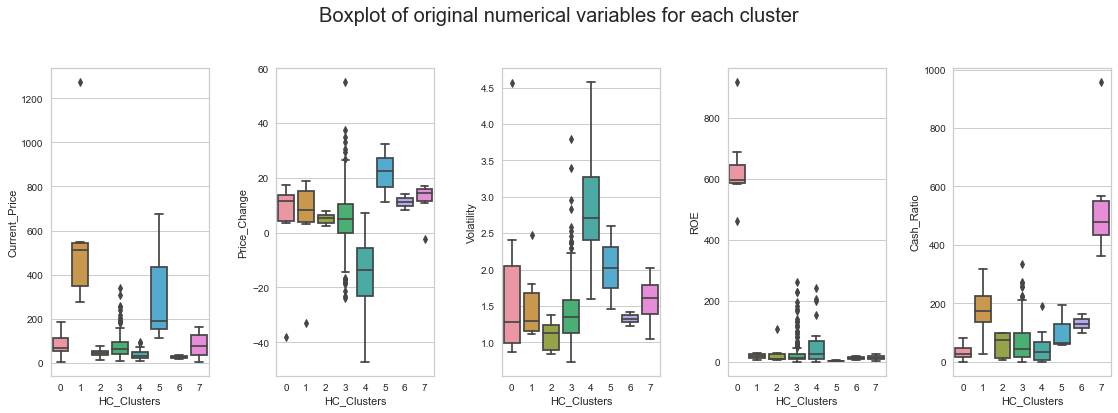

<IPython.core.display.Javascript object>

In [92]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='HC_Clusters'>

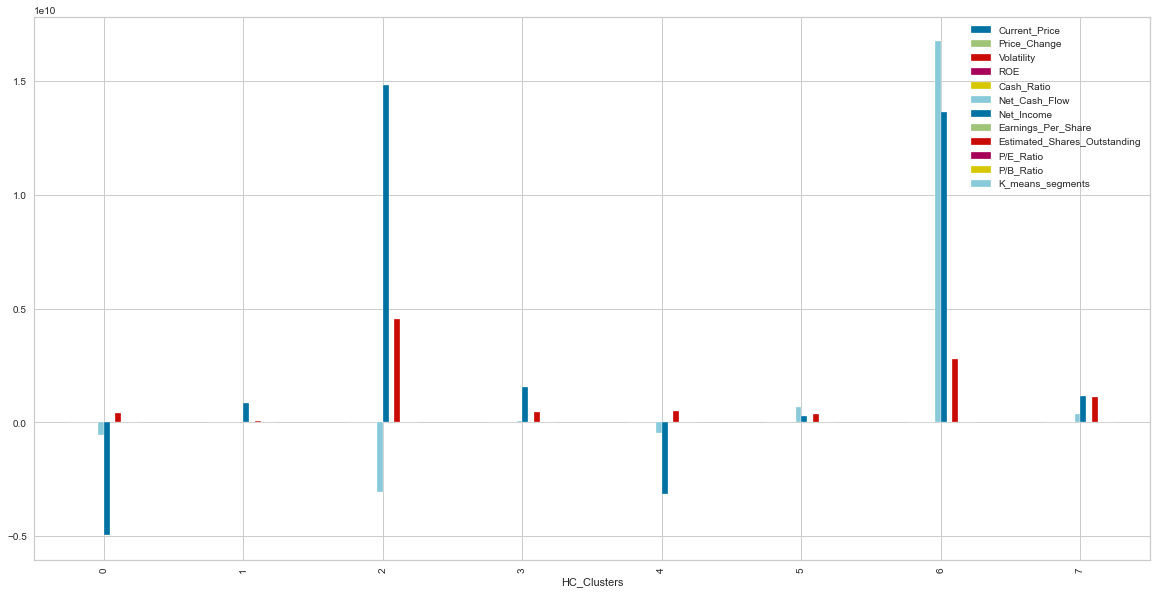

<IPython.core.display.Javascript object>

In [93]:
df.groupby("HC_Clusters").mean().plot.bar(figsize=(20, 10))

## Comparison between KMEANS and HIERARCHICAL CLUSTERING

* Time to run 
* Distinctness of clusters
* Silhouette scores
* Observations
* Number of clusters

**Observations**

- The cluster with highest Current Price is cluster 1 which is comprised of Alliance Data Systems, Chipolte Mexican Grill, Equinix, Intuitive Surgical Inc, Priceline.com Inc, Regeneron
- Price change highest overall positive would come from cluster 5 ( Alexion Pharmaceuticals, Amazon.com, Netflix Inc)
- Price change lowest comes from cluster 4 ( 22 securities) 
- Highest Volatility comes from cluster 4 as well, lowest volatility comes from cluster 2
- The best ROE comes from the 0 cluster which comprised of the following securities: Allegion ( Industrials-Building Products), Apache Corporation(Energy- Oil and Gas exploration), Chesapeake Energy(Energy- Integrated Oil and Gas) , Charter Communications ( Consumer Discretionary-Cable and Satellite), Colgate-Palmolive(Consumer Staples- Household Products), Kimberly-Clark (Consumer Staples- Household Products), S&P Global, Inc ( Financials- Diversified Financial Services) 
- Cash_Ratio- best would come from cluster 7 (Amgen, Facebook, Frontier Communications, Monster Beverage, Waters Corporation, Yahoo Inc) 

## Business Recommendations

- Both Hierarchical and KMeans provided similar results, generally the more risk the higher the potential reward. 
- 